<a href="https://colab.research.google.com/github/teyoon1105/deeplearning/blob/main/food_classification_train_valid(complex_metrix).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### kaggle.json 파일을 불러와 kaggle key값 가져오기

kaggle.json 파일이 '/content/kaggle.json' 경로에 생성되었습니다.


### kaggle data 사용하기 위해 root 디렉토리 아래 .kaggle 파일 복사

In [3]:
import os
import shutil

os.makedirs('/root/.kaggle', exist_ok=True)
path = os.getcwd()

if not os.path.exists(os.path.join('/root/.kaggle', 'kaggle.json')):
    src = os.path.join(path, 'kaggle.json')
    dst = os.path.join('/root/.kaggle', 'kaggle.json')
    shutil.copy(src, dst)

### kaggle data 다운로드

In [4]:
!chmod 700 /root/.kaggle/kaggle.json
!kaggle datasets download -d harishkumardatalab/food-image-classification-dataset

Dataset URL: https://www.kaggle.com/datasets/harishkumardatalab/food-image-classification-dataset
License(s): CC0-1.0
100% 1.68G/1.68G [00:43<00:00, 45.1MB/s]
100% 1.68G/1.68G [00:43<00:00, 41.3MB/s]


### 다운된 kaggle zip 파일 unzip

In [5]:
!unzip -qq food-image-classification-dataset.zip -d /content/food_data

### 압축해제한 zip 파일의 이름을 가독성 좋게 food_data로 변경

In [6]:
import os

folder_name = "/content/food_data/Food Classification dataset"
new_folder_name = "/content/food_data/train_dataset"

# 폴더 이름 변경
os.rename(folder_name, new_folder_name)

print(f'폴더 이름이 {new_folder_name}으로 변경되었습니다.')

폴더 이름이 /content/food_data/train_dataset으로 변경되었습니다.


### train, valid, test 데이터의 경로, 디렉토리 설정

In [7]:
# data path를 만들고
# valid path 만들고 해당 폴더에 클래스 갯수에 맞게 폴더 생성
dataPath = '/content/food_data/'
trainPath = os.path.join(dataPath, 'train_dataset/')
validPath = '/content/food_data/valid_dataset/'
os.makedirs(validPath, exist_ok=True)
testPath = '/content/food_data/test_dataset/'
os.makedirs(testPath, exist_ok=True)

### 색 채널 변경 코드

In [8]:
import numpy as np
from PIL import Image

def convert_image_to_rgb(image_path):
    # Pillow로 이미지 열기
    img_pil = Image.open(image_path)

    if img_pil.mode != 'RGB':
        # Pillow 이미지 모드에 따라 처리
        if img_pil.mode == 'P':  # P 모드 (팔레트 모드)
            print("Converting P mode to RGB...")
            img_pil = img_pil.convert('RGB')

        elif img_pil.mode == 'RGBA':  # RGBA 모드 (알파 채널 포함)
            print("Converting RGBA to RGB...")
            img_pil = img_pil.convert('RGB')

        elif img_pil.mode == 'CMYK':  # CMYK 모드
            print("Converting CMYK to RGB...")
            img_pil = img_pil.convert('RGB')


        img_pil.save(image_path)
        print(f"Image saved at: {image_path}")

food_list = os.listdir(trainPath)
for food in food_list:
    img_path = os.path.join(trainPath, food)
    for filename in os.listdir(img_path):
        image_path = os.path.join(img_path, filename)
        convert_image_to_rgb(image_path)
        image = Image.open(os.path.join(img_path, filename))
        if image.mode != 'RGB':
            print(f'RGB로 전환되지 않았습니다 : {image.mode}')




Converting P mode to RGB...
Image saved at: /content/food_data/train_dataset/Donut/Donut (35).png
Converting RGBA to RGB...
Image saved at: /content/food_data/train_dataset/Donut/Donut (30).png
Converting P mode to RGB...
Image saved at: /content/food_data/train_dataset/Donut/Donut (19).png
Converting RGBA to RGB...
Image saved at: /content/food_data/train_dataset/Donut/Donut (37).png
Converting P mode to RGB...
Image saved at: /content/food_data/train_dataset/Donut/Donut (23).png
Converting RGBA to RGB...
Image saved at: /content/food_data/train_dataset/Donut/Donut (40).png
Converting P mode to RGB...
Image saved at: /content/food_data/train_dataset/Donut/Donut (18).png
Converting P mode to RGB...
Image saved at: /content/food_data/train_dataset/Donut/Donut (13).png
Converting RGBA to RGB...
Image saved at: /content/food_data/train_dataset/Donut/Donut (32).png
Converting RGBA to RGB...
Image saved at: /content/food_data/train_dataset/Donut/Donut (33).png
Converting RGBA to RGB...
Imag

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Image saved at: /content/food_data/train_dataset/Hot Dog/Hot Dog - Train (13).png
Converting RGBA to RGB...
Image saved at: /content/food_data/train_dataset/Hot Dog/Hot Dog - Train (10).png
Converting P mode to RGB...
Image saved at: /content/food_data/train_dataset/Hot Dog/Hot Dog - Train (6).png
Converting P mode to RGB...
Image saved at: /content/food_data/train_dataset/Hot Dog/Hot Dog - Train (7).png
Converting P mode to RGB...
Image saved at: /content/food_data/train_dataset/Hot Dog/Hot Dog - Train (14).png
Converting P mode to RGB...
Image saved at: /content/food_data/train_dataset/Hot Dog/Hot Dog - Train (5).png
Converting P mode to RGB...
Image saved at: /content/food_data/train_dataset/Hot Dog/Hot Dog - Train (12).png
Converting P mode to RGB...
Image saved at: /content/food_data/train_dataset/Hot Dog/Hot Dog - Train (3).png
Converting P mode to RGB...
Image saved at: /content/food_data/train_dataset/Hot Dog/Hot Dog - Train (17).png
Converting P mode to RGB...
Image saved at: 

### train data 확인

In [9]:
food_list = os.listdir(trainPath)
print(len(food_list))
for food in food_list:
    path = os.path.join(trainPath, food)
    print(food, len(os.listdir(path)))

34
kaathi_rolls 279
ice_cream 1000
Sandwich 1500
Donut 1500
chole_bhature 376
chai 344
apple_pie 1000
cheesecake 1000
fried_rice 350
momos 323
pizza 275
idli 302
Crispy Chicken 1500
samosa 244
paani_puri 144
kulfi 214
pav_bhaji 305
burger 331
omelette 1000
Taco 1500
jalebi 288
Fries 1500
dhokla 245
dal_makhani 295
Taquito 1500
Hot Dog 1548
Baked Potato 1500
butter_naan 307
sushi 1000
pakode 269
chicken_curry 1000
chapati 327
masala_dosa 273
kadai_paneer 334


In [ ]:
print(os.listdir(trainPath))

['Donut', 'Hot Dog', 'paani_puri', 'butter_naan', 'dhokla', 'kaathi_rolls', 'cheesecake', 'pav_bhaji', 'kulfi', 'ice_cream', 'Taco', 'momos', 'dal_makhani', 'Fries', 'chicken_curry', 'fried_rice', 'chole_bhature', 'idli', 'jalebi', 'pizza', 'chapati', 'sushi', 'burger', 'Sandwich', 'pakode', 'Baked Potato', 'Taquito', 'apple_pie', 'chai', 'Crispy Chicken', 'samosa', 'omelette', 'kadai_paneer', 'masala_dosa']


### valid data에 train 데이터와 같은 폴더 생성

In [10]:
# 해당 경로에 train data의 폴더 갯수에 맞게 클래스 별로 하위 폴더 생성
valid_list = os.listdir(trainPath)
for folder in valid_list:
    os.makedirs(os.path.join(validPath, folder), exist_ok=True)

### valid data에 train 데이터와 같은 폴더 생성

In [11]:
test_list = os.listdir(trainPath)
for folder in test_list:
    os.makedirs(os.path.join(testPath, folder), exist_ok=True)

### train data의 0.15를 test data로 사용

In [12]:
import os
import random
import shutil

test_ratio = 0.2

subfolder = os.listdir(trainPath)
for folder in subfolder:
    train_subPath = os.path.join(trainPath, folder)
    test_subPath = os.path.join(testPath, folder)

    file_list = os.listdir(train_subPath)
    random.shuffle(file_list)

    random_files = random.sample(file_list, int(len(file_list)*test_ratio))
    for files in random_files:
        oldPath = os.path.join(train_subPath, files)
        newPath = os.path.join(test_subPath, files)
        if os.path.isfile(oldPath):
            shutil.move(oldPath, newPath)

    print(f'{folder}파일이 train_data에서 test_data로 복사되었습니다.')


kaathi_rolls파일이 train_data에서 test_data로 복사되었습니다.
ice_cream파일이 train_data에서 test_data로 복사되었습니다.
Sandwich파일이 train_data에서 test_data로 복사되었습니다.
Donut파일이 train_data에서 test_data로 복사되었습니다.
chole_bhature파일이 train_data에서 test_data로 복사되었습니다.
chai파일이 train_data에서 test_data로 복사되었습니다.
apple_pie파일이 train_data에서 test_data로 복사되었습니다.
cheesecake파일이 train_data에서 test_data로 복사되었습니다.
fried_rice파일이 train_data에서 test_data로 복사되었습니다.
momos파일이 train_data에서 test_data로 복사되었습니다.
pizza파일이 train_data에서 test_data로 복사되었습니다.
idli파일이 train_data에서 test_data로 복사되었습니다.
Crispy Chicken파일이 train_data에서 test_data로 복사되었습니다.
samosa파일이 train_data에서 test_data로 복사되었습니다.
paani_puri파일이 train_data에서 test_data로 복사되었습니다.
kulfi파일이 train_data에서 test_data로 복사되었습니다.
pav_bhaji파일이 train_data에서 test_data로 복사되었습니다.
burger파일이 train_data에서 test_data로 복사되었습니다.
omelette파일이 train_data에서 test_data로 복사되었습니다.
Taco파일이 train_data에서 test_data로 복사되었습니다.
jalebi파일이 train_data에서 test_data로 복사되었습니다.
Fries파일이 train_data에서 test_data로 복사되었습니다.
dhokla파일이 train_dat

### train 데이터의 0.15를  valid로 이동

In [13]:
import os
import random
import shutil

valid_ratio = 0.25


subfolder = os.listdir(trainPath)
for folder in subfolder:
    train_subPath = os.path.join(trainPath, folder)
    valid_subPath = os.path.join(validPath, folder)

    file_list = os.listdir(train_subPath)
    random.shuffle(file_list)

    random_files = random.sample(file_list, int(len(file_list)*valid_ratio))
    for files in random_files:
        oldPath = os.path.join(train_subPath, files)
        newPath = os.path.join(valid_subPath, files)
        if os.path.isfile(oldPath):
            shutil.move(oldPath, newPath)

    print(f'{folder}파일이 train_data에서 valid_data로 복사되었습니다.')





kaathi_rolls파일이 train_data에서 valid_data로 복사되었습니다.
ice_cream파일이 train_data에서 valid_data로 복사되었습니다.
Sandwich파일이 train_data에서 valid_data로 복사되었습니다.
Donut파일이 train_data에서 valid_data로 복사되었습니다.
chole_bhature파일이 train_data에서 valid_data로 복사되었습니다.
chai파일이 train_data에서 valid_data로 복사되었습니다.
apple_pie파일이 train_data에서 valid_data로 복사되었습니다.
cheesecake파일이 train_data에서 valid_data로 복사되었습니다.
fried_rice파일이 train_data에서 valid_data로 복사되었습니다.
momos파일이 train_data에서 valid_data로 복사되었습니다.
pizza파일이 train_data에서 valid_data로 복사되었습니다.
idli파일이 train_data에서 valid_data로 복사되었습니다.
Crispy Chicken파일이 train_data에서 valid_data로 복사되었습니다.
samosa파일이 train_data에서 valid_data로 복사되었습니다.
paani_puri파일이 train_data에서 valid_data로 복사되었습니다.
kulfi파일이 train_data에서 valid_data로 복사되었습니다.
pav_bhaji파일이 train_data에서 valid_data로 복사되었습니다.
burger파일이 train_data에서 valid_data로 복사되었습니다.
omelette파일이 train_data에서 valid_data로 복사되었습니다.
Taco파일이 train_data에서 valid_data로 복사되었습니다.
jalebi파일이 train_data에서 valid_data로 복사되었습니다.
Fries파일이 train_data에서 valid_data로 복사되었습니

### train에서 valid, test로 옮기고 난 뒤 해당 폴더에 제대로 move가 되었는지 확인

In [14]:
food_list = os.listdir(trainPath)
print(food_list)

['Donut', 'Hot Dog', 'paani_puri', 'butter_naan', 'dhokla', 'kaathi_rolls', 'cheesecake', 'pav_bhaji', 'kulfi', 'ice_cream', 'Taco', 'momos', 'dal_makhani', 'Fries', 'chicken_curry', 'fried_rice', 'chole_bhature', 'idli', 'jalebi', 'pizza', 'chapati', 'sushi', 'burger', 'Sandwich', 'pakode', 'Baked Potato', 'Taquito', 'apple_pie', 'chai', 'Crispy Chicken', 'samosa', 'omelette', 'kadai_paneer', 'masala_dosa']


In [14]:
check_train = os.listdir(trainPath)
for Tr_list in check_train:
    print(Tr_list, len(os.listdir(os.path.join(trainPath, Tr_list))))

kaathi_rolls 168
ice_cream 600
Sandwich 900
Donut 900
chole_bhature 226
chai 207
apple_pie 600
cheesecake 600
fried_rice 210
momos 195
pizza 165
idli 182
Crispy Chicken 900
samosa 147
paani_puri 87
kulfi 129
pav_bhaji 183
burger 199
omelette 600
Taco 900
jalebi 174
Fries 900
dhokla 147
dal_makhani 177
Taquito 900
Hot Dog 930
Baked Potato 900
butter_naan 185
sushi 600
pakode 162
chicken_curry 600
chapati 197
masala_dosa 165
kadai_paneer 201


In [15]:
check_valid = os.listdir(validPath)
for V_list in check_valid:
    print(V_list, len(os.listdir(os.path.join(validPath, V_list))))

kaathi_rolls 56
ice_cream 200
Sandwich 300
Donut 300
chole_bhature 75
chai 69
apple_pie 200
cheesecake 200
fried_rice 70
momos 64
pizza 55
idli 60
Crispy Chicken 300
samosa 49
paani_puri 29
kulfi 43
pav_bhaji 61
burger 66
omelette 200
Taco 300
jalebi 57
Fries 300
dhokla 49
dal_makhani 59
Taquito 300
Hot Dog 309
Baked Potato 300
butter_naan 61
sushi 200
pakode 54
chicken_curry 200
chapati 65
masala_dosa 54
kadai_paneer 67


In [16]:
check_test = os.listdir(testPath)
for Te_list in check_test:
    print(Te_list, len(os.listdir(os.path.join(testPath, Te_list))))

kaathi_rolls 55
ice_cream 200
Sandwich 300
Donut 300
chole_bhature 75
chai 68
apple_pie 200
cheesecake 200
fried_rice 70
momos 64
pizza 55
idli 60
Crispy Chicken 300
samosa 48
paani_puri 28
kulfi 42
pav_bhaji 61
burger 66
omelette 200
Taco 300
jalebi 57
Fries 300
dhokla 49
dal_makhani 59
Taquito 300
Hot Dog 309
Baked Potato 300
butter_naan 61
sushi 200
pakode 53
chicken_curry 200
chapati 65
masala_dosa 54
kadai_paneer 66


### 데이터의 정규화를 위해 평균과 표준편차를 구하기

In [17]:
import torch
from PIL import Image
import numpy as np
import os
import torchvision.transforms as transforms

def cal_mean_std(img_path):


    mean = torch.zeros(3, dtype=torch.float)
    std_sum = torch.zeros(3, dtype=torch.float)  # 분산을 누적하기 위한 변수
    total_pixels = 0  # 전체 픽셀 수를 저장

    if os.path.isdir(img_path):  # img_path가 폴더인지 확인
        for folder_name in os.listdir(img_path):  # 각 폴더 이름을 가져옴
            folderPath = os.path.join(img_path, folder_name)
            if os.path.isdir(folderPath):  # 폴더인지 확인
                for filename in os.listdir(folderPath):  # 폴더 내의 파일 목록 가져옴
                    imgPath = os.path.join(folderPath, filename)
                    if os.path.isfile(imgPath):
                        img = Image.open(imgPath)
                        # ToTensor()를 사용하여 0~1로 정규화
                        tensor_image = transforms.ToTensor()(img)

                        total_pixels += tensor_image.shape[1] * tensor_image.shape[2]

                        # 채널별 픽셀 값을 모두 합산
                        for i in range(3):
                            mean[i] += tensor_image[i, :, :].sum()

        # 전체 픽셀 수로 나눠서 평균 계산
        mean /= total_pixels

        # 전체 이미지 데이터셋의 표준 편차 계산

        for folder_name in os.listdir(img_path):
            folderPath = os.path.join(img_path, folder_name)
            if os.path.isdir(folderPath):
                    for filename in os.listdir(folderPath):  # 폴더 내의 파일 목록 가져옴
                        imgPath = os.path.join(folderPath, filename)
                        if os.path.isfile(imgPath):
                            img = Image.open(imgPath)
                            # ToTensor()를 사용하여 0~1로 정규화
                            tensor_image = transforms.ToTensor()(img)
                            for i in range(3):
                                std_sum[i] += ((tensor_image[i, :, :] - mean[i]) ** 2).sum()  # 분산을 누적

        std = torch.sqrt(std_sum / total_pixels)  # 전체 이미지 데이터셋의 표준 편차 계산

        return mean, std
    else:
        print(f"Error: '{img_path}' is not a directory.")

        return None, None

### train, valid transforms 만들기

In [18]:
from torchvision import transforms

org_size = (256, 256)
img_size = (224, 224)

brightness = 0.1
contrast = 0.1
saturation = 0.1
hue = 0.1

mean_train, std_train =  cal_mean_std(trainPath)
mean_valid, std_valid =  cal_mean_std(validPath)
mean_test, std_test =  cal_mean_std(testPath)


# train data를 증식
train_transform = transforms.Compose([
    transforms.Resize(org_size),
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(224),
    transforms.ColorJitter(brightness=brightness, contrast=contrast, saturation=saturation, hue = hue),
    transforms.ToTensor()
    ,
    transforms.Normalize(mean = mean_train, std = std_train)

])
valid_transform = transforms.Compose([
    transforms.Resize(org_size),
    transforms.ToTensor()
    ,
    transforms.Normalize(mean = mean_valid, std = std_valid)

])

test_transform = transforms.Compose([
    transforms.Resize(org_size),
    transforms.ToTensor()
    ,
    transforms.Normalize(mean = mean_test, std = std_test)

])

In [47]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
class CustomImageFolder(datasets.ImageFolder):
    def __getitem__(self, index):
        # ImageFolder의 기본 __getitem__ 메서드를 호출하여 이미지와 레이블을 가져옵니다.
        original_tuple = super(CustomImageFolder, self).__getitem__(index)
        path = self.samples[index][0]  # 이미지 파일 경로
        filename = os.path.basename(path)  # 파일 이름 추출

        # 이미지, 레이블, 파일 이름을 튜플로 반환합니다.
        return original_tuple + (filename,path)  # 튜플에 파일 이름 추가

### train, valid dataset, loader 만들기

In [76]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

batchsize = 32

train_dataset = datasets.ImageFolder(root=trainPath, transform=train_transform)
valid_dataset = datasets.ImageFolder(root=validPath, transform=valid_transform)
test_dataset = CustomImageFolder(root=testPath, transform=test_transform)

# 데이터 로더 생성 (batch_size는 필요에 따라 조정)
train_loader = DataLoader(train_dataset, batch_size=batchsize, shuffle=True)
class_train_idx = train_dataset.class_to_idx
print(class_train_idx)

valid_loader = DataLoader(valid_dataset, batch_size=batchsize, shuffle=False)
class_valid_idx = valid_dataset.class_to_idx
print(class_valid_idx)

test_loader = DataLoader(test_dataset, batch_size=batchsize, shuffle=False)
class_test_idx = test_dataset.class_to_idx
print(class_test_idx)

{'Baked Potato': 0, 'Crispy Chicken': 1, 'Donut': 2, 'Fries': 3, 'Hot Dog': 4, 'Sandwich': 5, 'Taco': 6, 'Taquito': 7, 'apple_pie': 8, 'burger': 9, 'butter_naan': 10, 'chai': 11, 'chapati': 12, 'cheesecake': 13, 'chicken_curry': 14, 'chole_bhature': 15, 'dal_makhani': 16, 'dhokla': 17, 'fried_rice': 18, 'ice_cream': 19, 'idli': 20, 'jalebi': 21, 'kaathi_rolls': 22, 'kadai_paneer': 23, 'kulfi': 24, 'masala_dosa': 25, 'momos': 26, 'omelette': 27, 'paani_puri': 28, 'pakode': 29, 'pav_bhaji': 30, 'pizza': 31, 'samosa': 32, 'sushi': 33}
{'Baked Potato': 0, 'Crispy Chicken': 1, 'Donut': 2, 'Fries': 3, 'Hot Dog': 4, 'Sandwich': 5, 'Taco': 6, 'Taquito': 7, 'apple_pie': 8, 'burger': 9, 'butter_naan': 10, 'chai': 11, 'chapati': 12, 'cheesecake': 13, 'chicken_curry': 14, 'chole_bhature': 15, 'dal_makhani': 16, 'dhokla': 17, 'fried_rice': 18, 'ice_cream': 19, 'idli': 20, 'jalebi': 21, 'kaathi_rolls': 22, 'kadai_paneer': 23, 'kulfi': 24, 'masala_dosa': 25, 'momos': 26, 'omelette': 27, 'paani_puri':

In [21]:
!pip install pytorch-ignite

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 312.7/312.7 kB 16.4 MB/s eta 0:00:00


### early stopping 설정

In [65]:
# EarlyStopping 클래스
class EarlyStopping:
    def __init__(self, patience=7, verbose=False, delta=0, path='checkpoint.pt'):
        """
        Args:
            patience (int): 성능 개선이 없을 때 몇 번의 에포크까지 기다릴지.
            verbose (bool): True일 경우 개선될 때마다 메시지 출력.
            delta (float): 성능 개선으로 간주될 최소 변화량.
        """
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = float('inf')
        self.delta = delta
        self.path = path

    def __call__(self, val_loss, model):
        score = val_loss
        # 처음에 호출됐을때는 best_score가 None이라서 초기값을 설정
        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        # 지금까지의 best_score와 현재 score를 비교
        elif score > self.best_score + self.delta:
            self.counter += 1
            if self.verbose:
                print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
                print(f'val_loss :{score}')
            # patience값이 모두 충족했을때, 종료조건이 만족될때
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        '''검증 손실이 감소하면 모델을 저장합니다.'''
        if self.verbose:
            print(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
            torch.save(model.state_dict(), self.path)  # 모델 상태 저장
        self.val_loss_min = val_loss

# EarlyStopping 인스턴스 생성 (patience=10)
early_stopping = EarlyStopping(patience=10, verbose=True, path='resnet50_best.pth')

### 모델 설정

In [23]:
import torchvision.models as models
from torchvision.models import ResNet50_Weights
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision.models import resnet50, mobilenet_v3_large
from torch.optim.lr_scheduler import ReduceLROnPlateau


In [66]:
class ModifiedResNet50(nn.Module):
    def __init__(self):
        super(ModifiedResNet50, self).__init__()
        self.base_model = models.resnet50(weights=ResNet50_Weights.DEFAULT)
        num_ftrs = self.base_model.fc.in_features
        self.base_model.fc = nn.Linear(num_ftrs, 1024)
        self.bn1 = nn.BatchNorm1d(1024)
        self.fc1 = nn.Linear(1024, 512)
        self.bn2 = nn.BatchNorm1d(512)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(512, 34)

    def forward(self, x):
        x = self.base_model(x)
        x = self.bn1(x)
        x = self.fc1(x)
        x = self.bn2(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return x

### 분류기 설정

In [78]:
LR = 0.00001
EPOCHS = 5
model = ModifiedResNet50()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=LR)
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3)
model

ModifiedResNet50(
  (base_model): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential

### 모델 훈련

In [79]:
import time
from tqdm import tqdm
import matplotlib.pyplot as plt

def fit(model, criterion, optimizer, epochs, train_loader, valid_loader, resume=False):

    # 그래프로 출력하기 위한 리스트
    if resume==False:
        train_losses = []
        train_accuracies = []
        valid_losses = []
        valid_accuracies = []

    for epoch in range(epochs):
        start = time.time()

        model.train()

        train_loss = 0
        train_acc = 0
        train_correct = 0

        for train_x, train_y in tqdm(train_loader):
            train_x, train_y = train_x.to(device), train_y.to(device)
            optimizer.zero_grad()
            pred = model(train_x)
            loss = criterion(pred, train_y)
            loss.backward()
            optimizer.step()
            _, prediction = torch.max(pred.cpu(), 1)
            train_loss += loss.item()
            train_correct += prediction.eq(train_y.cpu()).int().sum()

        valid_loss = 0
        valid_acc = 0
        valid_correct = 0

        for valid_x, valid_y in valid_loader:
            with torch.no_grad():
                model.eval()
                valid_x, valid_y = valid_x.to(device), valid_y.to(device)
                pred = model(valid_x)
                loss = criterion(pred, valid_y)
                _, prediction = torch.max(pred.cpu(), 1)
                valid_loss += loss.item()
                valid_correct += prediction.eq(valid_y.cpu()).int().sum()

        train_acc = train_correct/len(train_loader.dataset)
        valid_acc = valid_correct/len(valid_loader.dataset)

        end = time.time()

        print(f'{end- start:.3f}sec : [Epoch {epoch+1}/{epochs}] -> train loss: {train_loss/len(train_loader):.4f}, train acc: {train_acc*100:.3f}% / valid loss: {valid_loss/len(valid_loader):.4f}, valid acc: {valid_acc*100:.3f}%')

        # 현재 LR값을 읽어올 수 있다
        scheduler.step(valid_loss)
        now_lr = optimizer.param_groups[0]['lr']
        print(f'learning_rate {epoch+1}: {now_lr:.8f}')


        # EarlyStopping을 호출하여 학습 중단 여부 확인
        early_stopping(valid_loss, model)

        # 학습 중단 조건을 충족하면 break
        if early_stopping.early_stop:
            print("Early stopping triggered.")
            break
        print('-' * 70)

In [80]:
# 학습
fit(model, criterion, optimizer, EPOCHS, train_loader, valid_loader, resume=False)

100%|██████████| 448/448 [05:41<00:00,  1.31it/s]


399.141sec : [Epoch 1/5] -> train loss: 2.5309, train acc: 34.598% / valid loss: 1.4926, valid acc: 68.986%
learning_rate 1: 0.00001000
Validation loss decreased (inf --> 223.895203).  Saving model ...
----------------------------------------------------------------------


100%|██████████| 448/448 [05:29<00:00,  1.36it/s]


386.344sec : [Epoch 2/5] -> train loss: 1.3444, train acc: 66.002% / valid loss: 0.9623, valid acc: 79.233%
learning_rate 2: 0.00001000
Validation loss decreased (223.895203 --> 144.349831).  Saving model ...
----------------------------------------------------------------------


100%|██████████| 448/448 [05:27<00:00,  1.37it/s]


383.997sec : [Epoch 3/5] -> train loss: 0.9446, train acc: 75.593% / valid loss: 0.7285, valid acc: 83.655%
learning_rate 3: 0.00001000
Validation loss decreased (144.349831 --> 109.280558).  Saving model ...
----------------------------------------------------------------------


100%|██████████| 448/448 [05:27<00:00,  1.37it/s]


383.589sec : [Epoch 4/5] -> train loss: 0.7347, train acc: 80.943% / valid loss: 0.5920, valid acc: 86.337%
learning_rate 4: 0.00001000
Validation loss decreased (109.280558 --> 88.795589).  Saving model ...
----------------------------------------------------------------------


100%|██████████| 448/448 [05:29<00:00,  1.36it/s]


385.122sec : [Epoch 5/5] -> train loss: 0.6027, train acc: 84.096% / valid loss: 0.5237, valid acc: 87.427%
learning_rate 5: 0.00001000
Validation loss decreased (88.795589 --> 78.552718).  Saving model ...
----------------------------------------------------------------------


### 예측이 다른 이미지 불러오기

In [89]:
import matplotlib.pyplot as plt
from PIL import Image
import os
import seaborn as sns
from sklearn.metrics import confusion_matrix, f1_score
# 테스트 데이터에서 성능을 평가하고, 예측이 잘못된 이미지를 시각화하는 함수
def evaluate_and_visualize(model, test_loader, criterion, class_names):
    test_loss = 0
    test_correct = 0
    test_total = 0
    #incorrect_images = []
    incorrect_labels = []
    incorrect_preds = []
    incorrect_filenames = []
    incorrect_filepath = []


    model.eval()
    all_labels = []
    all_preds = []
    with torch.no_grad():
        for test_x, test_y, filenames, path in tqdm(test_loader):
            test_x, test_y = test_x.to(device), test_y.to(device)
            pred = model(test_x)
            loss = criterion(pred, test_y)
            test_loss += loss.item()
            _, prediction = torch.max(pred.cpu(), 1)

            # 정확도 계산
            test_correct += prediction.eq(test_y.cpu()).int().sum()
            test_total += test_y.size(0)

            # 배치 내의 각 이미지에 대해 확인
            for i in range(len(prediction)):
                if prediction[i] != test_y[i].cpu():
                    incorrect_labels.append(test_y[i].cpu().numpy())  # 인덱싱 제거
                    incorrect_preds.append(prediction[i].cpu().numpy())  # 예측 결과 추가
                    incorrect_filenames.append(filenames[i])  # 파일 이름 추가
                    incorrect_filepath.append(path[i])


            all_preds.extend(prediction.cpu().numpy())
            all_labels.extend(test_y.cpu().numpy())

    test_accuracy = test_correct / test_total
    print("test_correct:{}, test_total:{}".format(test_correct, test_total))
    print(f'Test Loss: {test_loss / len(test_loader):.4f}, Test Accuracy: {test_accuracy * 100:.2f}%')

    print(len(incorrect_filenames))
    print(len(incorrect_filepath))

    # 예측이 잘못된 이미지 시각화
    fig = plt.figure(figsize=(12, 12))
    for i in range(min(16, len(incorrect_filenames))):
        ax = fig.add_subplot(4, 4, i + 1)
        image = Image.open(incorrect_filepath[i])
        ax.imshow(image)
        true_label = class_names[incorrect_labels[i]]  # 클래스 이름 사용
        pred_label = class_names[incorrect_preds[i]]  # 클래스 이름 사용
        filename = os.path.basename(incorrect_filenames[i])
        ax.set_title(f'Pred: {pred_label}, Label: {true_label}, {filename}', fontsize=10)
        ax.axis('off')

    plt.tight_layout()
    plt.show()


    # 혼동 행렬 시각화
    all_labels = np.array(all_labels)  # numpy 배열로 변환
    all_preds = np.array(all_preds)  # numpy 배열로 변환
    cm = confusion_matrix(all_labels.numpy(), all_preds.numpy())  # numpy 배열로 변환
    plt.figure(figsize=(12, 12))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()


100%|██████████| 149/149 [00:56<00:00,  2.65it/s]


test_correct:4137, test_total:4765
Test Loss: 0.5368, Test Accuracy: 86.82%
628
628


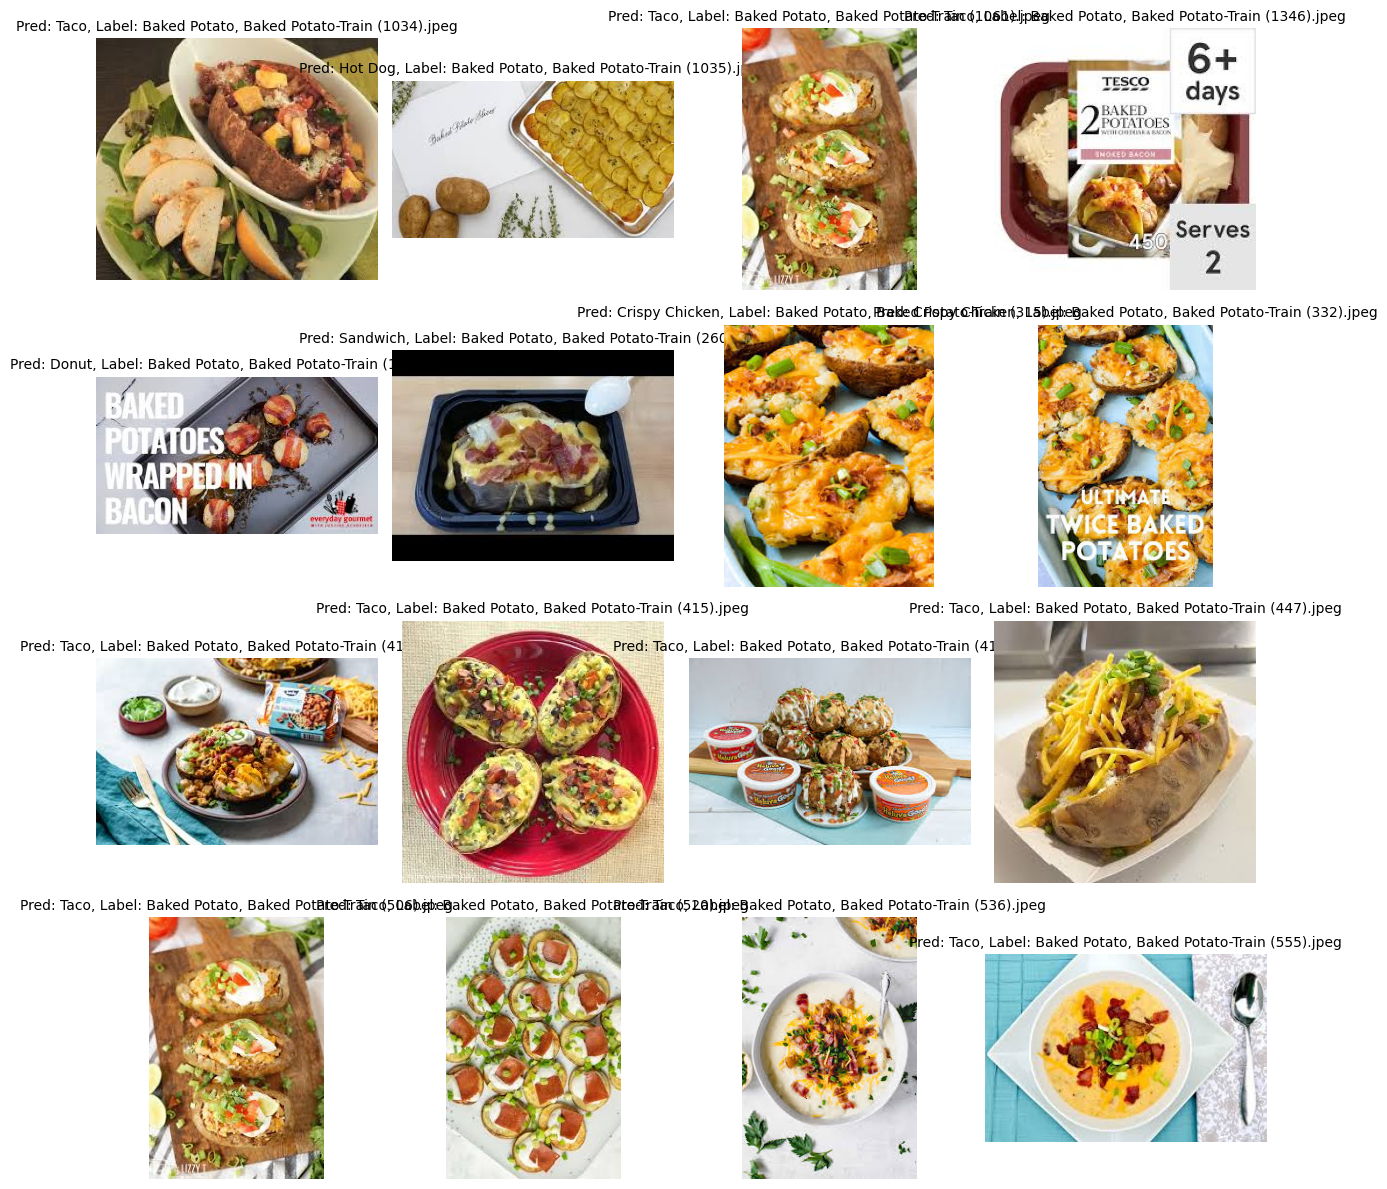

AttributeError: 'numpy.ndarray' object has no attribute 'numpy'

In [90]:
classnames = class_test_idx
class_names = list(classnames.keys())
evaluate_and_visualize(model, test_loader, criterion, class_names)